In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_csv = "data/classify_reduced.csv"
rf_df = pd.read_csv(file_csv, encoding="ISO-8859-1")
rf_df.head()

,IsHoliday,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,0,24924.50,NaN,NaN,NaN,NaN,NaN
1,0,41595.55,NaN,NaN,NaN,NaN,NaN
2,0,19403.54,NaN,NaN,NaN,NaN,NaN
3,0,21827.90,NaN,NaN,NaN,NaN,NaN
4,0,21043.39,NaN,NaN,NaN,NaN,NaN


In [4]:
# Replace missing values with 0
rf_df['MarkDown1'] = rf_df['MarkDown1'].fillna(0)
rf_df['MarkDown2'] = rf_df['MarkDown2'].fillna(0)
rf_df['MarkDown3'] = rf_df['MarkDown3'].fillna(0)
rf_df['MarkDown4'] = rf_df['MarkDown4'].fillna(0)
rf_df['MarkDown5'] = rf_df['MarkDown5'].fillna(0)
rf_df['Weekly_Sales'] = rf_df['Weekly_Sales'].fillna(0)

rf_df.head()

,IsHoliday,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,0,24924.50,0.0,0.0,0.0,0.0,0.0
1,0,41595.55,0.0,0.0,0.0,0.0,0.0
2,0,19403.54,0.0,0.0,0.0,0.0,0.0
3,0,21827.90,0.0,0.0,0.0,0.0,0.0
4,0,21043.39,0.0,0.0,0.0,0.0,0.0


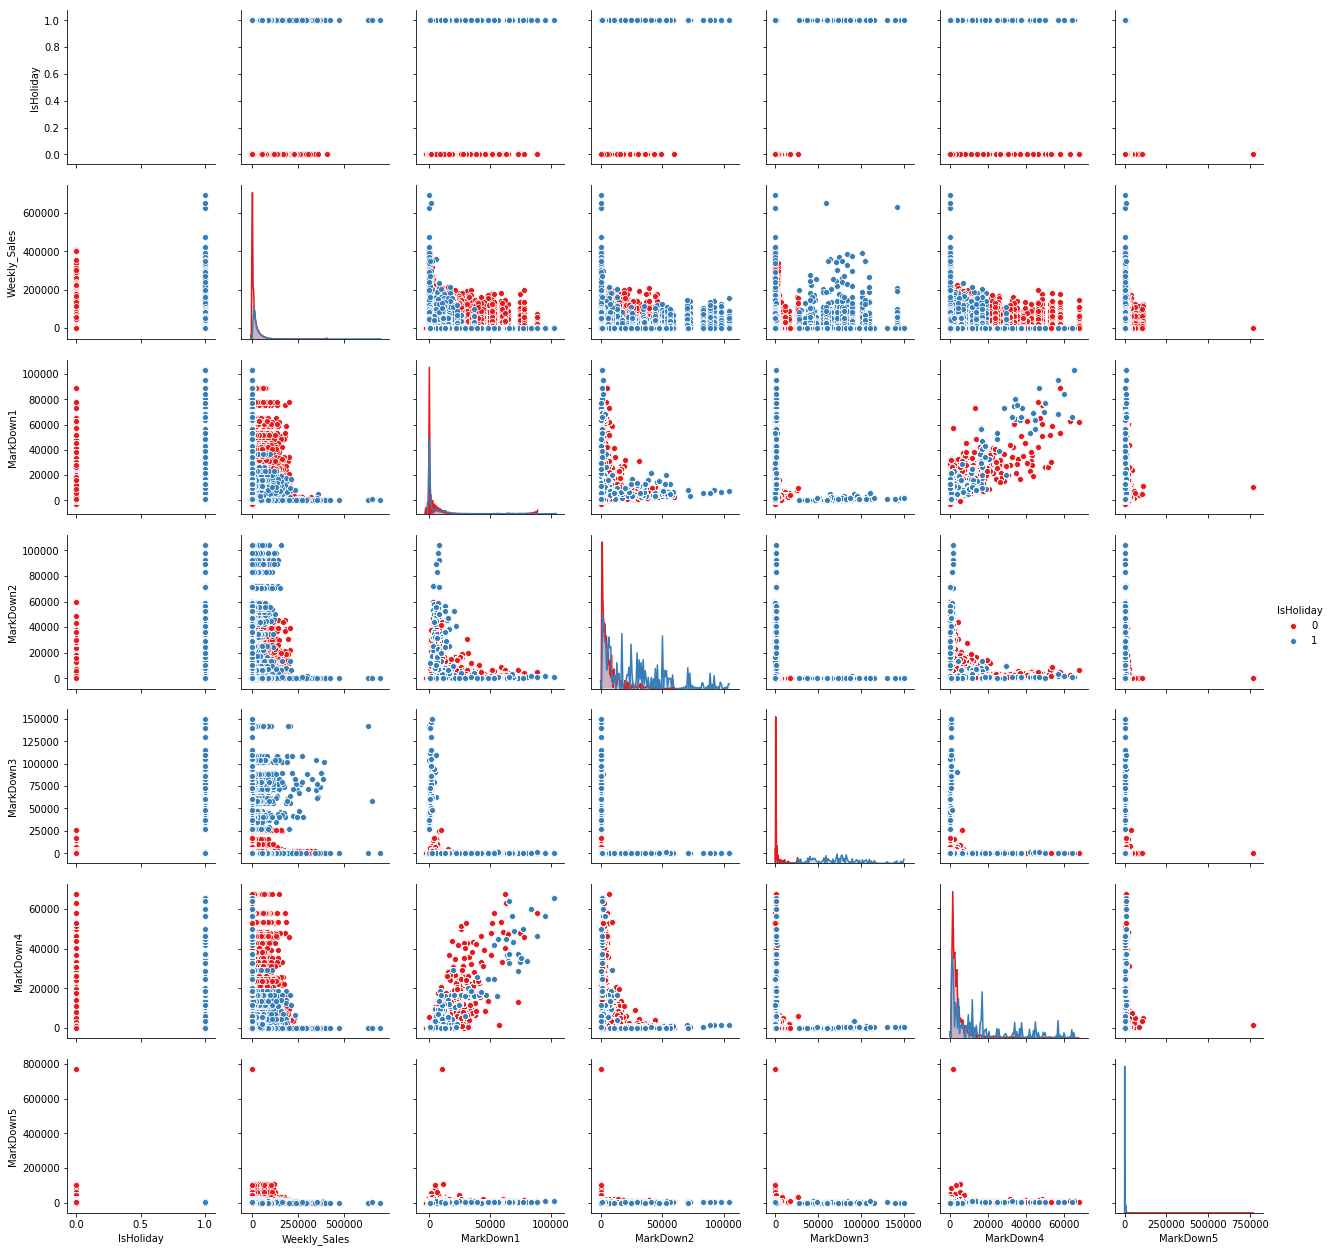

In [5]:
sns.pairplot(rf_df,hue='IsHoliday',palette='Set1')

In [6]:
X = rf_df.loc[:, rf_df.columns != 'IsHoliday']
X.head()

,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,24924.50,0.0,0.0,0.0,0.0,0.0
1,41595.55,0.0,0.0,0.0,0.0,0.0
2,19403.54,0.0,0.0,0.0,0.0,0.0
3,21827.90,0.0,0.0,0.0,0.0,0.0
4,21043.39,0.0,0.0,0.0,0.0,0.0


In [7]:
y = rf_df['IsHoliday'].to_frame()
y.head()

,IsHoliday
0,0
1,0
2,0
3,0
4,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
predictions = dtree.predict(X_test)

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    138039
           1       0.60      0.56      0.58     11503

   micro avg       0.94      0.94      0.94    149542
   macro avg       0.78      0.77      0.78    149542
weighted avg       0.94      0.94      0.94    149542



In [13]:
print(confusion_matrix(y_test,predictions))

[[133775   4264]
 [  5007   6496]]


In [14]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
rfc_pred = rfc.predict(X_test)

In [16]:
print(confusion_matrix(y_test,rfc_pred))

[[133750   4289]
 [  5003   6500]]


In [17]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    138039
           1       0.60      0.57      0.58     11503

   micro avg       0.94      0.94      0.94    149542
   macro avg       0.78      0.77      0.77    149542
weighted avg       0.94      0.94      0.94    149542

